# Derivative rules lab

In this lab, we will practice implementing the rules for derivatives with code.  This lab will review your understanding of the following:

1. The power rule
2. The constant factor rule
3. The addition rule

As you know we can represent polynomial functions as a list of tuples.  

* Each term is represented as a single tuple, for example, $2x^3$ is expressed as `(2, 3)`.
* And an entire function is expressed as a list of tuples, like $f(x)=2x^3+7x$ is expressed as `[(2, 3), (7, 1)]`.
* Between elements in our list, we imagine there is a plus sign. To subtract elements we simply place a negative sign before the first element in the tuple. For example, $f(x)= x^2 - 4x$ is represented as `[(1, 2), (-4, 1)]`. 

> **Remember:** tuples are just like lists except that they are immutable.  We can access elements of a tuple just as we do a list.

```python
two_x_cubed = (2, 3)
two_x_cubed[1] # 3
```

> But attempting to reassign the elements of a tuple raises an error

```python
two_x_cubed[1] = 4
TypeError: 'tuple' object does not support item assignment

```

### Writing our derivative functions

Let's start by writing a function called `find_term_derivative` that returns the derivative of a single term.  The function takes the derivative of one term represented as a tuple, say $(1, 3)$, and returns its derivative, also represented as a tuple.  For example, if the function is $f(x) = 2x^4$ so its derivative is $f'(x) = 2x^3$, then our function `find_term_derivative` should take an input of `(2, 4)` and return `(2, 3)`.

In writing `find_term_derivative`, let's first consider the function $f(x) = x^3$, and write the function so that it takes the derivative of the term.

In [13]:
one_x_cubed = (1, 3)

In [14]:
def find_term_derivative(term):
    derv = (term[0]*term[1], term[1] - 1)
    return derv

In [15]:
find_term_derivative(one_x_cubed) # (3, 2)

(3, 2)

Let's try the function with $f(x) = 2x^2$.

In [16]:
two_x_squared = (2, 2)
find_term_derivative(two_x_squared) # (4, 1)

(4, 1)

Ok, now that we have a Python function called `find_derivative` that can take a derivative of a term, write a function that take as an argument our multi-termed function, and return the derivative of the multi-term function represented as a list of tuples.  

For example, if the derivative of a function $f(x)$ is $f'(x) = 2x^3 + 4x^2$, then the function `find_derivative` should return `[(2, 3), (4, 2)]`.

> Imagine that a plus sign separates each of our terms.  Again, if we need a negative term, then we add a minus sign to the first element of the tuple.

Let's apply this function to $f(x) = 4x^3 - 3x$.

In [17]:
def find_derivative(function_terms):
    derv = []
    for i in range (len(function_terms)):
        new_derv = find_term_derivative(function_terms[i])
        derv.append(new_derv)
    derv = filter(lambda x: x[0] != 0, derv)
    return list(derv)

In [18]:
four_x_cubed_minus_three_x = [(4, 3), (-3, 1)]
find_derivative(four_x_cubed_minus_three_x)  # [(12, 2), (-3, 0)]

[(12, 2), (-3, 0)]

One gotcha to note is when one of our terms is a constant, when taking the derivative, the constant is removed.  For example, when $f(x) = 3x^2 - 11$, the derivative $f'(x) = 6x$.  The reason why is because 11 is the same as $11*x^0$ which is also $11*1$, as anything raised to the zero power equals 1. And so the derivative of the term $11x^0$ equals $0*11*x^{-1} = 0$.  Our `find_derivative` function should return, using `filter`, only the terms whose derivatives are not multiplied by zero.  

In [19]:
three_x_squared_minus_eleven = [(3, 2), (-11, 0)]
find_derivative(three_x_squared_minus_eleven) # [(6, 1)]

[(6, 1)]

Our next function is called, `derivative_at` which, when provided a list of terms and a value $x$ at which to evaluate the derivative, returns the value of derivative at that point.

In [20]:
# Feel free to use the output_at function in solving this

#calculus.py
def output_at(list_of_terms, x_value):
    outputs = list(map(lambda term: term_output(term, x_value), list_of_terms))
    return sum(outputs)

from calculus import output_at

def derivative_at(terms, x):
    out = 0
    derv = find_derivative(terms)
    for i in range (len(derv)):
        out = out + derv[i][0] * x ** derv[i][1]
    return out

In [21]:
print(find_derivative(three_x_squared_minus_eleven)) # [(6, 1)]
derivative_at(three_x_squared_minus_eleven, 2) # 12

[(6, 1)]


12

### Creating visualizations with our functions

Now that we have done the work of calculating the derivatives, we can begin to show the derivatives of functions with Plotly. We have plotted derivatives previously, but we have need to consider $\Delta x$ to do so.  Notice that with our rules, we no longer need to include $\Delta x$ as a parameter for our derivative calculating functions.  Similarly, we will not need to include $\Delta x$ as a parameter for our line tracing functions below.

#### Plotting the tangent line

First, let's take our `derivative_at` function, and use that in the `tangent_line` function below to display this calculation. The `derivative_at` a point on our function equals the slope of the tangent line, so we use the function to generate a `tangent_line` trace with the function below.

In [22]:
from calculus import output_at

def tangent_line(function_terms, x_value, line_length = 4):
    x_minus = x_value - line_length
    x_plus = x_value + line_length
    y = output_at(function_terms, x_value)
    ## here, we are using your function
    deriv = derivative_at(function_terms, x_value)
    print(deriv)
    y_minus = y - deriv * int(line_length)
    y_plus = y + deriv * line_length
    return {'x': [x_minus, x_value, x_plus], 'y': [y_minus, y, y_plus]}

In [23]:
from graph import plot
from plotly.offline import iplot, init_notebook_mode

from calculus import derivative_trace, function_values_trace

init_notebook_mode(connected=True)


tangent_at_five_trace = tangent_line(three_x_squared_minus_eleven, 5, line_length = 4)
three_x_squared_minus_eleven_trace = function_values_trace(three_x_squared_minus_eleven, list(range(-10, 10)))
plot([three_x_squared_minus_eleven_trace, tangent_at_five_trace])

30


In [24]:
tangent_at_five_trace 

{'x': [1, 5, 9], 'y': [-56, 64, 184]}

#### Graphing the derivative across a range of values

We can also write a function that given a list of terms can plot the derivative across multiple values. After all, the derivative is just a function. For example, when $f(x) = 3x^2 - 11$, the derivative is $f'(x) = 6x$. And we know that we can plot multi-term functions with our `function_values_trace`.

In [25]:
from calculus import function_values_trace
three_x_squared_minus_eleven = [(3, 2), (-11, 0)]
function_values_trace(three_x_squared_minus_eleven, list(range(-5, 5)))

{'x': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4],
 'y': [64, 37, 16, 1, -8, -11, -8, 1, 16, 37],
 'mode': 'lines',
 'name': 'data',
 'text': []}

This is what function_values_trace looks like:

> ```python
    def function_values_trace(list_of_terms, x_values):
        function_values = list(map(lambda x: output_at(list_of_terms, x),x_values))
        return trace_values(x_values, function_values, mode = 'line')
```


In [46]:
import matplotlib.pyplot as plt
def derivative_function_trace(list_of_terms, x_values):
    deriv = find_derivative(list_of_terms)
    function_values_trace(deriv, x_values)
    

SyntaxError: invalid syntax (<ipython-input-46-1e1b23c27445>, line 8)

In [41]:
function_values_trace(three_x_squared_minus_eleven,list(range(-5, 5)))
three_x_squared_minus_eleven_derivative_trace = derivative_function_trace(three_x_squared_minus_eleven, list(range(-5, 5)))




TypeError: 'int' object is not subscriptable

In [30]:
three_x_squared_minus_eleven_derivative_trace

So now that we can plot a nonlinear function with our `function_values_trace` and plot that function's derivative with the `derivative_function_trace` trace, we can now plot these traces side by side:

In [31]:
from plotly import tools
import plotly
import plotly.plotly as py

from graph import make_subplots

def side_by_side_derivative_rules(list_of_terms, x_values):
    function_trace = function_values_trace(list_of_terms, x_values)
    derivative_trace = derivative_function_trace(list_of_terms, x_values)
    if derivative_trace and function_trace:
        return make_subplots([function_trace], [derivative_trace])


Here we'll do that with $f(x) = 3x^2 - 11$ and $f'(x) = 6x $.

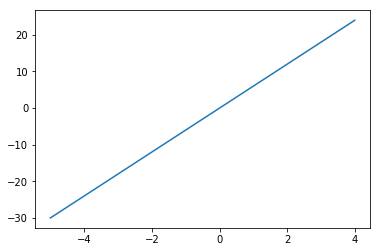

In [32]:
from graph import plot_figure
side_by_side_three_x_squared_minus_eleven = side_by_side_derivative_rules(three_x_squared_minus_eleven, list(range(-5, 5)))
if side_by_side_three_x_squared_minus_eleven:
    plot_figure(side_by_side_three_x_squared_minus_eleven)

Note that when the $x$ values of $f(x)$ are positive, the $f(x)$ begins increasing, therefore $f'(x)$ is greater than zero, which the graph on the right displays.  And the more positive the values $x$ for $f(x)$, the faster the rate of increase.  When our function $f(x)$ is negative, the function is decreasing, that is for every change in $x$, the change in $f(x)$ is negative, and therefore $f'(x)$ is negative.